<a href="https://colab.research.google.com/github/rabin20-04/ML-Algorithms/blob/main/Mnist_pca/Mnist_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('digit-recognizer/train.csv')
df_test = pd.read_csv('digit-recognizer/test.csv')

In [48]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [49]:
print(df.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [50]:
df_test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns       

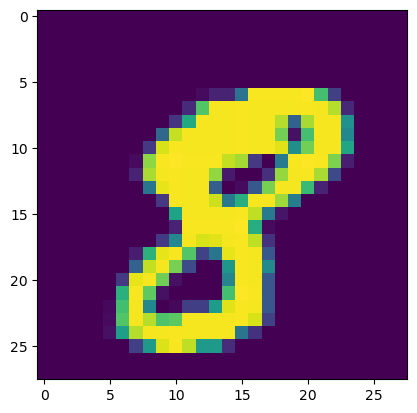

In [52]:
plt.imshow(df.iloc[10, 1:].values.reshape(28, 28))

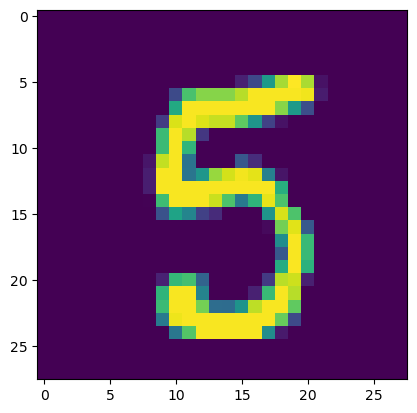

In [53]:
plt.imshow(df_test.iloc[10, 0:].values.reshape(28, 28))

In [54]:

X = df.iloc[:, 1:]
Y= df.iloc[:, 0]

# Phase I model 

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [58]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

# Phase II 

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [62]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [63]:
x_train_tf=pca.fit_transform(x_train)
x_test_tf=pca.transform(x_test)
print(x_train_tf.shape)
print(x_test_tf.shape)

(33600, 784)
(8400, 784)


In [64]:
knn_=KNeighborsClassifier()

In [65]:
knn_.fit(x_train_tf, y_train)
y_pred_tf = knn_.predict(x_test_tf)
accuracy_score(y_test,y_pred_tf)

0.9391666666666667

In [66]:
pca=PCA(n_components=200)
x_train_tf=pca.fit_transform(x_train)
x_test_tf=pca.transform(x_test)
print(x_train_tf.shape)
print(x_test_tf.shape)
knn_.fit(x_train_tf, y_train)
y_pred_tf = knn_.predict(x_test_tf)
accuracy_score(y_test,y_pred_tf)

(33600, 200)
(8400, 200)


0.9507142857142857

In [70]:
listt=[]
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(x_train)
    X_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier(n_jobs=4)
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    acc=accuracy_score(y_test,y_pred)
    listt.append(acc)
    
    print(acc)
    

0.2580952380952381
0.3236904761904762
0.5104761904761905
0.6663095238095238
0.7378571428571429
0.8227380952380953
0.8436904761904762
0.8721428571428571
0.886547619047619
0.9055952380952381
0.9116666666666666
0.9184523809523809
0.9276190476190476
0.9351190476190476
0.9384523809523809
0.9379761904761905
0.9407142857142857
0.94
0.9425
0.9442857142857143
0.9438095238095238
0.9441666666666667
0.9442857142857143
0.9457142857142857
0.9484523809523809
0.9479761904761905
0.9478571428571428
0.9471428571428572
0.949047619047619
0.9491666666666667
0.9507142857142857
0.9513095238095238
0.95
0.9504761904761905
0.950952380952381
0.9519047619047619
0.9517857142857142
0.9527380952380953
0.9533333333333334
0.9528571428571428
0.9522619047619048
0.9522619047619048
0.9523809523809523
0.9533333333333334
0.9528571428571428
0.9530952380952381
0.9530952380952381
0.9533333333333334
0.9527380952380953
0.9533333333333334
0.9545238095238096
0.954047619047619
0.9541666666666667
0.9541666666666667
0.9546428571428571

KeyboardInterrupt: 

## ` terminated due to long computation `

In [91]:
len(listt)

105

(array([], dtype=int64),)


/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_3407/2233958413.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  print(np.where(listt==max(listt)))


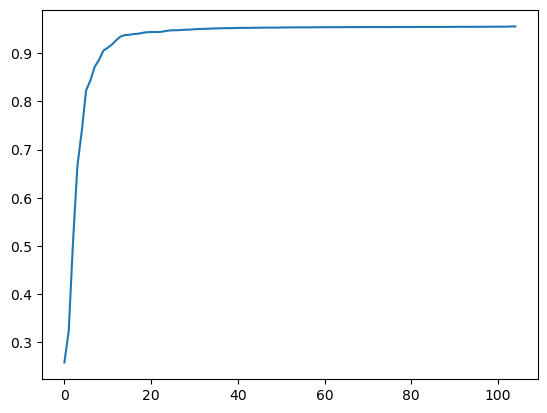

In [87]:

print(np.where(listt==max(listt)))
plt.plot(listt)

# Phase III Visualization 

In [88]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)

In [92]:
X_test_trf

array([[-5.00669776, -2.63019775],
       [-7.75779783, -1.47422566],
       [-7.47285122,  1.61830189],
       ...,
       [ 2.40771554, -1.55006574],
       [10.55730625, -2.46747756],
       [-3.42369586,  5.09417156]])

In [90]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [93]:
# transforming to a 3D coordinate system
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(x_train)
X_test_trf = pca.transform(x_test)

In [94]:
X_test_trf

array([[-5.00669776, -2.63019775,  2.70940772],
       [-7.75779783, -1.47422566,  2.83173459],
       [-7.47285122,  1.61830189, -5.40351285],
       ...,
       [ 2.40771554, -1.55006574,  8.98506077],
       [10.55730625, -2.46747756, -6.50195018],
       [-3.42369586,  5.09417156, -1.05542261]])

In [102]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(
                    xaxis_title='PCA 1',
                    yaxis_title='PCA 2',
                    zaxis_title='PCA 3'),
                    width=800,
                    height=800,
                    margin=dict(r=20, b=10, l=10, t=10)
)
fig.show()
